<a href="https://colab.research.google.com/github/ah20776/CE802/blob/main/Results/CE802_P3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.path.append("../")

%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
#Importing dataset saved in github
!git clone https://github.com/ah20776/CE802.git

fatal: destination path 'CE802' already exists and is not an empty directory.


In [3]:
#load P3 csv data
df = pd.read_csv('/content/CE802/CE802_P3_Data.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,High,UK,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,Medium,UK,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,Low,Rest,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,High,Rest,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,Medium,USA,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00


***ENCODING***

In [4]:
df = pd.get_dummies(df, columns=['F5'])
replace_map = {'F4': {'Very low':0, 'Low':1, 'Medium':2, 'High':3, 'Very high':4 }}
df.replace(replace_map, inplace=True)
df.head()

,F1,F2,F3,F4,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F5_Europe,F5_Rest,F5_UK,F5_USA
0,-39.32,5.72,-13.83,3,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99,0,0,1,0
1,-29.38,8.20,-11.07,2,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64,0,0,1,0
2,2.46,20.32,-7.59,1,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77,0,1,0,0
3,16.33,2.76,-8.40,3,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00,0,1,0,0
4,-14.93,9.98,-5.28,2,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00,0,0,0,1


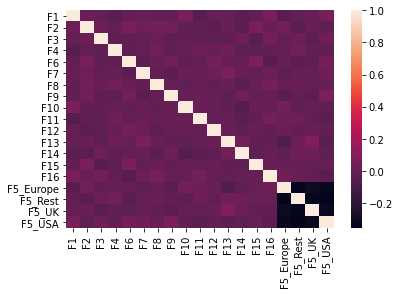

In [5]:
sns.heatmap(df.loc[:,df.columns != 'Target'].corr(), cmap= None)
plt.show()

In [6]:
df.loc[:,df.columns != 'Target'].corr()

,F1,F2,F3,F4,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F5_Europe,F5_Rest,F5_UK,F5_USA
F1,1.000000,0.017902,-0.004979,-0.039604,-0.006548,0.002309,-0.012594,-0.012025,0.064451,-0.050148,-0.000822,0.001042,-0.035125,-0.013438,0.061850,-0.041817,-0.013766,0.002369,0.052827
F2,0.017902,1.000000,0.018861,-0.002061,0.059413,0.026478,0.046542,0.037862,-0.013474,-0.022325,-0.028201,0.005397,-0.032430,0.060349,0.012850,0.034705,-0.029161,0.014971,-0.018869
F3,-0.004979,0.018861,1.000000,-0.027149,-0.014330,-0.008484,0.012457,-0.017546,-0.006276,-0.021228,-0.026931,-0.019297,0.025476,-0.042207,0.039825,-0.007620,0.019092,-0.036029,0.023105
F4,-0.039604,-0.002061,-0.027149,1.000000,-0.021556,-0.004617,0.033328,-0.018912,0.000250,0.028529,0.010806,0.029982,-0.023886,-0.025503,-0.008461,-0.004711,0.032117,-0.016098,-0.012509
F6,-0.006548,0.059413,-0.014330,-0.021556,1.000000,-0.027544,0.011987,0.032332,-0.013561,-0.005763,0.046442,0.006771,-0.001758,0.066430,-0.040372,0.000054,-0.027263,-0.023508,0.050749
F7,0.002309,0.026478,-0.008484,-0.004617,-0.027544,1.000000,-0.009240,-0.031183,0.007359,0.014407,0.016949,0.072085,0.006407,-0.012488,0.016704,-0.026325,-0.003016,0.003473,0.025547
F8,-0.012594,0.046542,0.012457,0.033328,0.011987,-0.009240,1.000000,0.000302,-0.011457,0.000099,-0.018839,0.006295,-0.027557,0.007560,0.051243,0.001553,0.010444,-0.013182,0.000654
F9,-0.012025,0.037862,-0.017546,-0.018912,0.032332,-0.031183,0.000302,1.000000,-0.004793,0.009609,-0.002310,-0.023763,0.020489,-0.006157,0.004091,-0.033068,-0.007310,-0.029612,0.068829
F10,0.064451,-0.013474,-0.006276,0.000250,-0.013561,0.007359,-0.011457,-0.004793,1.000000,0.005589,0.006516,-0.013712,-0.049907,0.004620,0.002825,0.046275,-0.025410,-0.005872,-0.013735
F11,-0.050148,-0.022325,-0.021228,0.028529,-0.005763,0.014407,0.000099,0.009609,0.005589,1.000000,0.003647,-0.001317,-0.036053,-0.007184,0.041882,0.019173,0.026506,-0.010787,-0.035406


In [7]:
df.isnull().values.any()

False

In [8]:
X = df.loc[:,df.columns != 'Target']
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state= 4)

In [9]:
linreg = LinearRegression()
parameter = {'fit_intercept' : [True,False], 'normalize' : [True, False]}
gridsearch = GridSearchCV(linreg, param_grid= parameter, cv=10, scoring= 'neg_mean_squared_error', n_jobs=1)
gridsearch.fit(X,y)
print (f"Mean Squared Error for GridSearch: {gridsearch.best_score_}")

Mean Squared Error for GridSearch: -258563.4120809793


In [10]:
print (f"Best parmeters for GridSearch: {gridsearch.best_params_}")

Best parmeters for GridSearch: {'fit_intercept': False, 'normalize': True}


In [11]:
gridsearch_pred = gridsearch.predict(X_test)
print (f"Mean Squared Error for test_data: {mean_squared_error(y_test, gridsearch_pred)}")

Mean Squared Error for test_data: 251257.80009770085


Text(0.5, 1.0, 'Linear Regression')

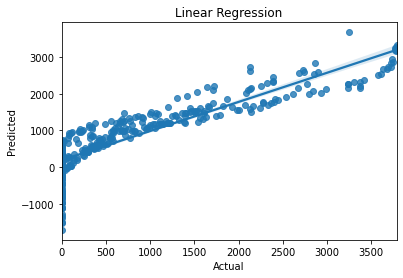

In [12]:
sns.regplot(x=y_test, y=gridsearch_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression")

In [13]:
ridgereg = Ridge()
parameter = {'fit_intercept' : [True,False], 'normalize' : [True, False], 'alpha':[0.8, 0.9, 1.0]}
gridsearch = GridSearchCV(ridgereg, param_grid= parameter, cv=10, scoring= 'neg_mean_squared_error', n_jobs=1)
gridsearch.fit(X,y)
print (f"Mean Squared Error for GridSearch: {gridsearch.best_score_}")

Mean Squared Error for GridSearch: -258569.98880794412


In [14]:
print (f"Best parmeters for GridSearch: {gridsearch.best_params_}")

Best parmeters for GridSearch: {'alpha': 0.8, 'fit_intercept': True, 'normalize': False}


In [15]:
gridsearch_pred = gridsearch.predict(X_test)
print (f"Mean Squared Error for test_data: {mean_squared_error(y_test, gridsearch_pred)}")

Mean Squared Error for test_data: 251231.1715000519


Text(0.5, 1.0, 'Ridge Regression')

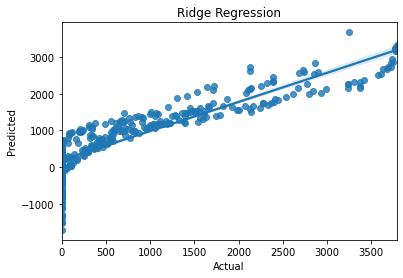

In [16]:
sns.regplot(x=y_test, y=gridsearch_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ridge Regression")

In [17]:
lassoreg = Lasso()
parameter = {'fit_intercept' : [True,False], 'normalize' : [True, False], 'alpha':[0.8, 0.9, 1.0], 'precompute':[True, False]}
gridsearch = GridSearchCV(lassoreg, param_grid= parameter, cv=10, scoring= 'neg_mean_squared_error', n_jobs=1)
gridsearch.fit(X,y)
print (f"Mean Squared Error for GridSearch: {gridsearch.best_score_}")

Mean Squared Error for GridSearch: -258556.638633843


In [18]:
print (f"Best parmeters for GridSearch: {gridsearch.best_params_}")

Best parmeters for GridSearch: {'alpha': 0.8, 'fit_intercept': True, 'normalize': False, 'precompute': True}


In [19]:
gridsearch_pred = gridsearch.predict(X_test)
print (f"Mean Squared Error for test_data: {mean_squared_error(y_test, gridsearch_pred)}")

Mean Squared Error for test_data: 251019.26356084942


Text(0.5, 1.0, 'Lasso Regression')

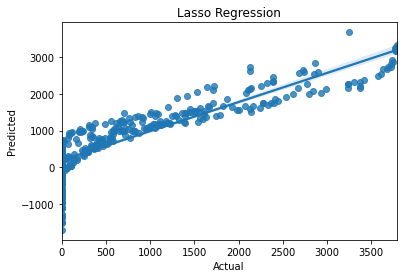

In [20]:
sns.regplot(x=y_test, y=gridsearch_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Lasso Regression")

In [21]:
df_test = pd.read_csv('/content/CE802/CE802_P3_Test.csv')

In [22]:
df_test = pd.get_dummies(df_test, columns=['F5'])
replace_map = {'F4': {'Very low':0, 'Low':1, 'Medium':2, 'High':3, 'Very high':4 }}
df_test.replace(replace_map, inplace=True)
df_test.head()

,F1,F2,F3,F4,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F5_Europe,F5_Rest,F5_UK,F5_USA
0,-39.37,4.22,-4.05,4,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN,0,0,1,0
1,-39.37,7.72,-3.48,0,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN,0,1,0,0
2,16.25,7.08,-5.31,0,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN,1,0,0,0
3,23.08,5.82,-5.91,0,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN,0,0,1,0
4,-21.30,15.14,-4.02,2,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN,0,0,0,1


In [23]:
df_test['Target'] = gridsearch.predict(df_test.loc[:,df_test.columns != 'Target'])

In [24]:
df_test.to_csv('CE802_P3_Test.csv')